In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [3]:
# iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



##### Feature Selection


In [5]:
# Lasso (L1 regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.01, random_state=42)
lasso.fit(X_train, y_train)
selected_lasso = X.columns[np.abs(lasso.coef_).sum(axis=0) > 0]



In [6]:
# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(solver='liblinear', random_state=42), n_features_to_select=2)
rfe.fit(X_train, y_train)
selected_rfe = X.columns[rfe.support_]



In [7]:
#  Tree-based importance (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
selected_rf = feature_importances.nlargest(2).index



In [8]:
#  PCA (2D visualization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [9]:
# Train model on selected features
models = {"Original": X, "Lasso": X[selected_lasso], "RFE": X[selected_rfe], "Random Forest": X[selected_rf]}
accuracies = {}

for name, X_selected in models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)


In [ ]:
##### PCA VISUALIZATION

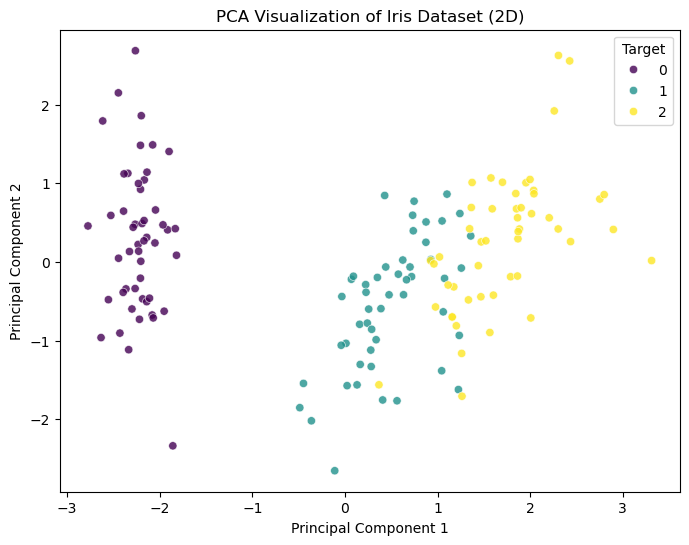

In [10]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Iris Dataset (2D)")
plt.legend(title="Target")
plt.show()



In [11]:
# Display feature selection results and model accuracies
selected_features = {
    "Lasso": list(selected_lasso),
    "RFE": list(selected_rfe),
    "Random Forest": list(selected_rf),
    "Model Accuracies": accuracies
}

selected_features


{'Lasso': ['sepal length (cm)', 'petal length (cm)'],
 'RFE': ['sepal width (cm)', 'petal width (cm)'],
 'Random Forest': ['petal width (cm)', 'petal length (cm)'],
 'Model Accuracies': {'Original': 0.9,
  'Lasso': 0.9,
  'RFE': 0.9333333333333333,
  'Random Forest': 0.9666666666666667}}